In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import pandas as pd
import numpy as np  
import sys

In [2]:
# Might be ideal to have the actual data - we don't have that as its stuck on BR200. But ... could rerun and use that. 
# But for now will jsut use the cell data and will get get the pulsese later.     

## Analysis of apoptosis across multiple intervention pulse widths: Lets begin

By introducing the apoptotic agents in a single, short pulse, we can observe differences in the efficacy of putatively equivalent interventions (See Cell Fate Analysis T-LGL Model notebook). Some interventions work only when applied for an exceptionally long duration.

### Load and process live cell data

This model includes only one population - so we extracted the live cells from each simulation time output. This data was placed in a CSV file. 

Here we load this into a dataframe, get the mean for the replicate runs, and finally plot all time courses. 

In [3]:
df_raw = pd.read_csv('../dataframes/aggregated_live_cells_time.csv', index_col=0)
df_raw.head()

,0.0,12.0,24.0,36.0,48.0,60.0,72.0,84.0,96.0,108.0,...,7812.0,7824.0,7836.0,7848.0,7860.0,7872.0,7884.0,7896.0,7908.0,7920.0
intervention,,,,,,,,,,,,,,,,,,,,,
EG_Ceramide_S1P_1_11,1500,1501,1502,1505,1506,1507,1507,1507,1508,1510,...,337,336,333,331,332,329,330,324,323,321
EG_Ceramide_S1P_1_12,1500,1502,1505,1508,1509,1509,1510,1515,1515,1518,...,389,389,387,385,382,381,379,381,380,379
EG_Ceramide_S1P_1_13,1500,1501,1504,1506,1507,1509,1510,1513,1514,1516,...,326,324,322,320,316,316,313,313,314,314
EG_Ceramide_S1P_1_21,1500,1500,1500,1501,1505,1506,1508,1508,1510,1512,...,1,1,1,1,1,1,1,1,1,1
EG_Ceramide_S1P_1_22,1500,1503,1505,1506,1507,1510,1512,1514,1515,1517,...,1,1,1,1,1,1,1,1,1,1


We will mainly be using the transpose of `raw` so lets transpose it. 

In [4]:
df = df_raw.transpose()
df.head(100)

intervention,EG_Ceramide_S1P_1_11,EG_Ceramide_S1P_1_12,EG_Ceramide_S1P_1_13,EG_Ceramide_S1P_1_21,EG_Ceramide_S1P_1_22,EG_Ceramide_S1P_1_23,EG_Ceramide_S1P_1_31,EG_Ceramide_S1P_1_32,EG_Ceramide_S1P_1_33,EG_GAP_RAS_1_11,...,SM_pro_Ceramidepro_RAS_33,SM_pro_TBETpro_Ceramidepro_ERK_11,SM_pro_TBETpro_Ceramidepro_ERK_12,SM_pro_TBETpro_Ceramidepro_ERK_13,SM_pro_TBETpro_Ceramidepro_ERK_21,SM_pro_TBETpro_Ceramidepro_ERK_22,SM_pro_TBETpro_Ceramidepro_ERK_23,SM_pro_TBETpro_Ceramidepro_ERK_31,SM_pro_TBETpro_Ceramidepro_ERK_32,SM_pro_TBETpro_Ceramidepro_ERK_33
0.0,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,...,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
12.0,1501,1502,1501,1500,1503,1501,1502,1502,1502,1502,...,1500,1501,1504,1502,1501,1503,1500,1501,1502,1500
24.0,1502,1505,1504,1500,1505,1502,1504,1503,1502,1505,...,1502,1501,1504,1503,1505,1504,1502,1502,1504,1500
36.0,1505,1508,1506,1501,1506,1505,1505,1503,1505,1505,...,1503,1501,1506,1504,1505,1506,1504,1503,1505,1502
48.0,1506,1509,1507,1505,1507,1507,1508,1504,1509,1508,...,1505,1502,1509,1507,1508,1506,1506,1503,1507,1503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140.0,1342,1336,1339,826,849,813,815,827,804,1595,...,641,1285,1284,1324,695,707,702,720,690,670
1152.0,1337,1332,1341,818,845,807,811,821,799,1596,...,632,1285,1285,1322,689,699,694,711,684,666
1164.0,1336,1333,1338,809,836,799,798,815,789,1597,...,628,1284,1284,1320,680,692,689,699,671,658
1176.0,1334,1328,1336,803,832,792,786,806,782,1601,...,621,1283,1280,1319,676,682,679,698,663,643


Now we have something to plot! Lets chck them out!!

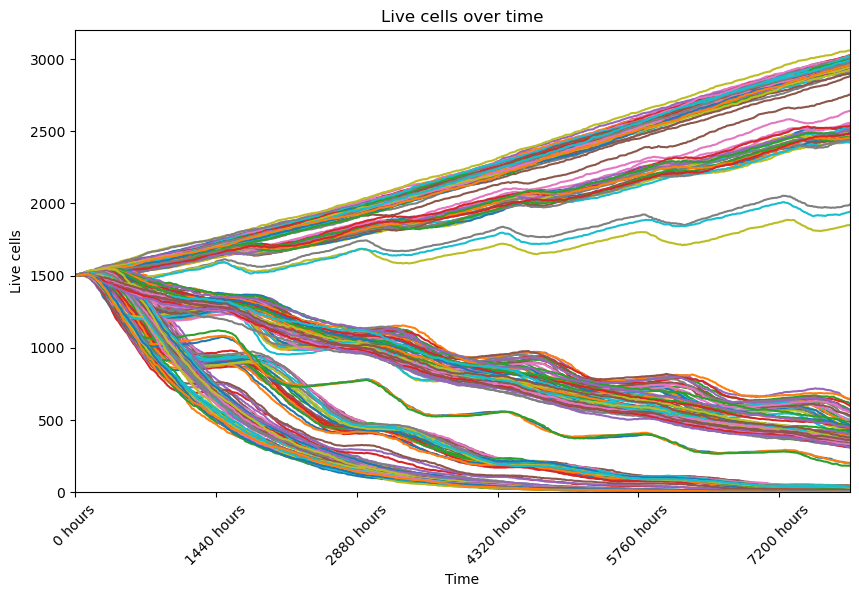

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

for intervention in df:
    plt.plot(df.index, df[intervention])

plt.title('Live cells over time')
plt.xlabel('Time')
plt.ylabel('Live cells')
plt.ylim(0, 3200)
plt.xlim(0, df.index[-1])
ticks = np.arange(0, len(df.index), 120)
plt.xticks(ticks, rotation=45)

# Use set_major_formatter to format ticks as hours

def fmt_index_to_hours(x, pos):
    x = x * 12 # 12 minutes per index
    return f'{x:.0f} hours'

ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))
plt.show()

### Add in above threshold shading.
Lets add when the substrates are above the thresholds - this is coming from the decay equation. 

Substrates are introduce uniformly across the domain - and begin to decay immediately. Cells have a 0.5 threshold for activation of the intervention node (the node that begins to alter dynamcis of the otherwise steady state Boolean network). We tested 3 decay rates, resulting in three durations of time above threshold. 

- Fast decay (short pulse): 0.0116 1/min
- Medium decay (medium pulse): 0.00192 1/min
- Slow decay (long pulse): 0.000963 1/min

Correspondingly, each substrate above threshold time (pulse width) is:

- 1 hour
- 6 hours
- 12 hours


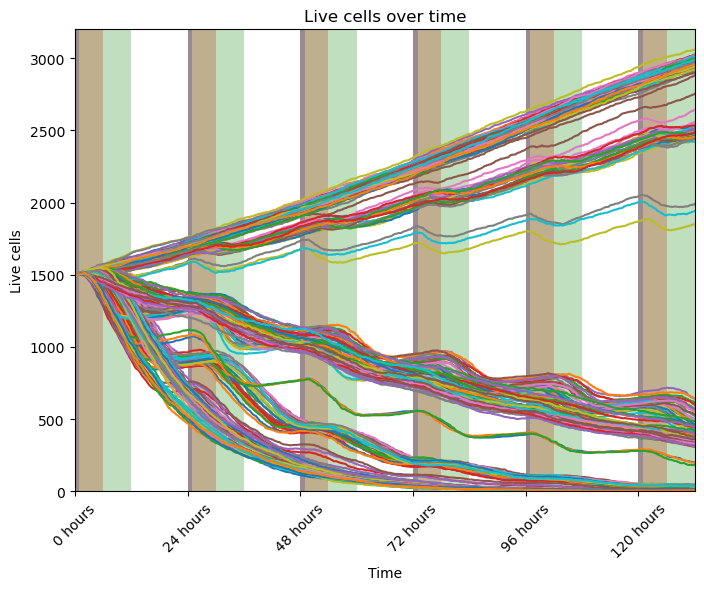

In [6]:

fig, ax = plt.subplots(figsize=(8, 6))

for intervention in df:
    plt.plot(df.index, df[intervention])

plt.title('Live cells over time')
plt.xlabel('Time')
plt.ylabel('Live cells')
plt.ylim(0, 3200)
plt.xlim(0, df.index[-1])
ticks = np.arange(0, len(df.index), 120)
plt.xticks(ticks, rotation=45)

# Use set_major_formatter to format ticks as hours

def fmt_index_to_hours(x, pos):
    x = x * 12/60 # 12 minutes per index
    return f'{x:.0f} hours'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

# Highlighting the time period from 15.12.2022 to 1.01.2023 and customizing the shaded area
# plt.axvspan(0, 5, facecolor='yellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5)

# put these in a loop to color code the different time periods - every 24 hours.
for tick in ticks:
    plt.axvspan(tick, tick+5, facecolor='blue', alpha=0.25, linewidth=5)
    plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, linewidth=5)
    plt.axvspan(tick, tick+60, facecolor='green', alpha=0.25, linewidth=5)

plt.show()



### Get means and replot

We did these results in triplicate. The data is organized in bunchs of 3 (last digit of the name holds the replicate number) - so we take advantage of this and just average in sets of three. 

In [7]:
# Create a new DataFrame to store the averaged values

df_avg = pd.DataFrame()

# Process columns in steps of three
for i in range(0, len(df.columns), 3):
    # The base name for the averaged column can be derived from the first of each three columns,
    # removing the last digit and the underscore immediately preceding it.
    # This needs fixed - jsut need to remove the last digit
    base_name = df.columns[i][:-1]  # Remove only the last character (replicate number)
    # print(base_name)
    
    # Select the three replicate columns
    replicate_cols = df.iloc[:, i:i+3]
    # print(replicate_cols)
    
    # Calculate the average of these columns
    df_avg[base_name] = replicate_cols.mean(axis=1)

print(df_avg.shape)
df_avg.tail()

(661, 84)


,EG_Ceramide_S1P_1_1,EG_Ceramide_S1P_1_2,EG_Ceramide_S1P_1_3,EG_GAP_RAS_1_1,EG_GAP_RAS_1_2,EG_GAP_RAS_1_3,EG_IL15_GAP_0_1,EG_IL15_GAP_0_2,EG_IL15_GAP_0_3,EG_IL2RBT_IL2RB_0_1,...,SM_pro_Ceramidepro_PI3Kpro_ERK_3,SM_pro_Ceramidepro_PI3Kpro_MEK_1,SM_pro_Ceramidepro_PI3Kpro_MEK_2,SM_pro_Ceramidepro_PI3Kpro_MEK_3,SM_pro_Ceramidepro_RAS_1,SM_pro_Ceramidepro_RAS_2,SM_pro_Ceramidepro_RAS_3,SM_pro_TBETpro_Ceramidepro_ERK_1,SM_pro_TBETpro_Ceramidepro_ERK_2,SM_pro_TBETpro_Ceramidepro_ERK_3
7872.0,342.000000,1.0,2.333333,2457.000000,623.000000,35.333333,2429.333333,620.333333,37.333333,2485.000000,...,0.333333,349.333333,2.333333,1.333333,339.000000,1.333333,2.333333,332.666667,2.666667,2.0
7884.0,340.666667,1.0,2.333333,2458.333333,619.666667,35.000000,2428.666667,616.000000,37.000000,2487.666667,...,0.333333,348.666667,2.333333,1.333333,338.000000,1.333333,2.333333,331.333333,2.666667,2.0
7896.0,339.333333,1.0,2.333333,2457.000000,618.333333,34.333333,2430.000000,611.666667,36.000000,2490.000000,...,0.333333,346.666667,2.333333,1.333333,336.333333,1.333333,2.333333,330.000000,2.666667,2.0
7908.0,339.000000,1.0,2.333333,2456.000000,613.333333,34.000000,2430.000000,608.666667,36.000000,2492.000000,...,0.333333,346.333333,2.333333,1.333333,334.666667,1.333333,2.000000,329.333333,2.666667,2.0
7920.0,338.000000,1.0,2.333333,2456.666667,609.666667,34.000000,2432.333333,604.333333,35.666667,2493.666667,...,0.333333,345.000000,2.333333,1.333333,333.666667,1.333333,2.000000,328.666667,2.666667,2.0


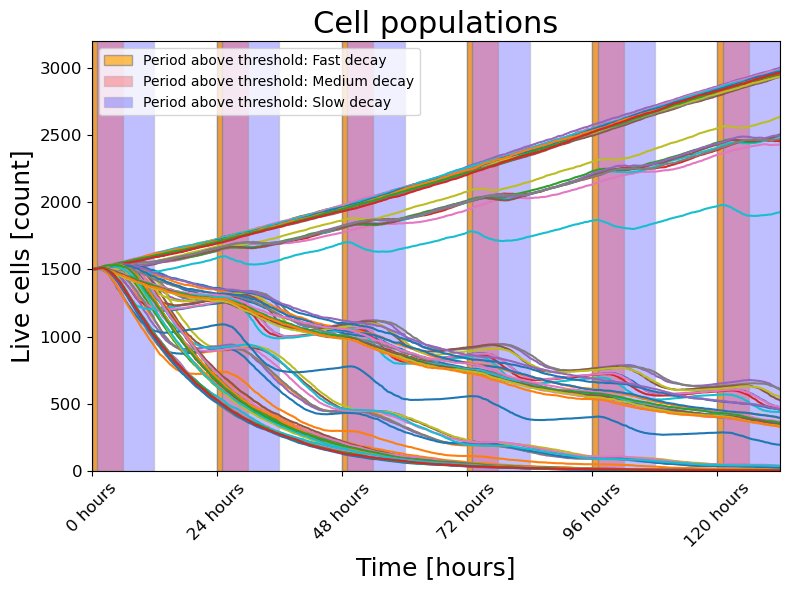

In [8]:

fig, ax = plt.subplots(figsize=(8, 6))

for intervention in df_avg:
    plt.plot(df_avg.index, df_avg[intervention])

plt.title('Cell populations', fontsize=22)
plt.xlabel('Time [hours]', fontsize=18)
plt.ylabel('Live cells [count]', fontsize=18)
plt.xlim(0, df_avg.index[-1])
plt.ylim(0, 3200)
ticks = np.arange(0, len(df_avg.index), 120)
plt.xticks(ticks, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Use set_major_formatter to format ticks as hours

def fmt_index_to_hours(x, pos):
    x = x * 12/60 # 12 minutes per index
    return f'{x:.0f} hours'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

# Highlighting the time period from 15.12.2022 to 1.01.2023 and customizing the shaded area
# plt.axvspan(0, 5, facecolor='yellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5)

# put these in a loop to color code the different time periods - every 24 hours.
for tick in ticks:

    plt.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=1)
    plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=1)
    plt.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=1)

##### WARNING - THIS ORDER IS (PROPOSEFULLY) REVERSED FROM ABOVE!!!!!!
plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)


plt.legend()
plt.tight_layout()
plt.show()

### GREAT! Lets break this down more. Split out by category.

We have 9 categories:

Decay lengths:
- Slow decay
- Medium decay
- Fasts decay

Target control algorithm:
- Egdetic control (EG)
- IBMFA (IB)
- Stable motifs

Lets separate them out - then jsut make all 9.


Make the transpose - to use its index

In [9]:
df_avg_transpose = df_avg.transpose()
df_avg_transpose.head()

,0.0,12.0,24.0,36.0,48.0,60.0,72.0,84.0,96.0,108.0,...,7812.0,7824.0,7836.0,7848.0,7860.0,7872.0,7884.0,7896.0,7908.0,7920.0
EG_Ceramide_S1P_1_1,1500.0,1501.333333,1503.666667,1506.333333,1507.333333,1508.333333,1509.000000,1511.666667,1512.333333,1514.666667,...,350.666667,349.666667,347.333333,345.333333,343.333333,342.000000,340.666667,339.333333,339.000000,338.000000
EG_Ceramide_S1P_1_2,1500.0,1501.333333,1502.333333,1504.000000,1506.333333,1507.666667,1509.000000,1509.666667,1511.333333,1512.666667,...,1.333333,1.333333,1.333333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EG_Ceramide_S1P_1_3,1500.0,1502.000000,1503.000000,1504.333333,1507.000000,1509.666667,1511.333333,1512.000000,1513.333333,1514.666667,...,2.666667,2.666667,2.666667,2.666667,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333
EG_GAP_RAS_1_1,1500.0,1502.000000,1503.333333,1504.000000,1507.000000,1509.333333,1510.000000,1511.000000,1511.666667,1512.666667,...,2460.333333,2460.666667,2459.333333,2458.333333,2457.333333,2457.000000,2458.333333,2457.000000,2456.000000,2456.666667
EG_GAP_RAS_1_2,1500.0,1501.666667,1503.000000,1504.333333,1506.000000,1507.000000,1508.000000,1510.000000,1511.000000,1513.666667,...,645.333333,639.666667,634.666667,630.000000,627.333333,623.000000,619.666667,618.333333,613.333333,609.666667


Make categories dataframe - getting the algorithm and decay

In [10]:
df_categories = pd.DataFrame(index=df_avg_transpose.index)

for index in df_avg_transpose.index:
    split_index = index.split('_', 10)
    df_categories.loc[index, 'algorithm'] = split_index[0]
    df_categories.loc[index, 'decay'] = split_index[-1]
    # df_temp.loc[index, 'type'] = split_index[-2] # this would involve string matching to really do right (pro = 1, anti=0)


df_categories

,algorithm,decay
EG_Ceramide_S1P_1_1,EG,1
EG_Ceramide_S1P_1_2,EG,2
EG_Ceramide_S1P_1_3,EG,3
EG_GAP_RAS_1_1,EG,1
EG_GAP_RAS_1_2,EG,2
...,...,...
SM_pro_Ceramidepro_RAS_2,SM,2
SM_pro_Ceramidepro_RAS_3,SM,3
SM_pro_TBETpro_Ceramidepro_ERK_1,SM,1
SM_pro_TBETpro_Ceramidepro_ERK_2,SM,2


Then we dfs with column names corresponding to the column names in df_average split by decay type, intervention type, and both.

We could assemble a nice plot of all of these or subsets ifwe wanted to. I'll ... just plot them singly for right now. But could do subplots to get comparisions as needed. 

In [11]:
df_short_decay = df_categories[df_categories.decay == '1'].transpose()

df_medium_decay = df_categories[df_categories.decay == '2'].transpose()

df_long_decay = df_categories[df_categories.decay == '3'].transpose()

df_EG = df_categories[df_categories.algorithm == 'EG'].transpose()

df_IB = df_categories[df_categories.algorithm == 'IB'].transpose()

df_SM = df_categories[df_categories.algorithm == 'SM'].transpose()

### Short, medium, and long decay

I'll split each off in its own plat

SHORT

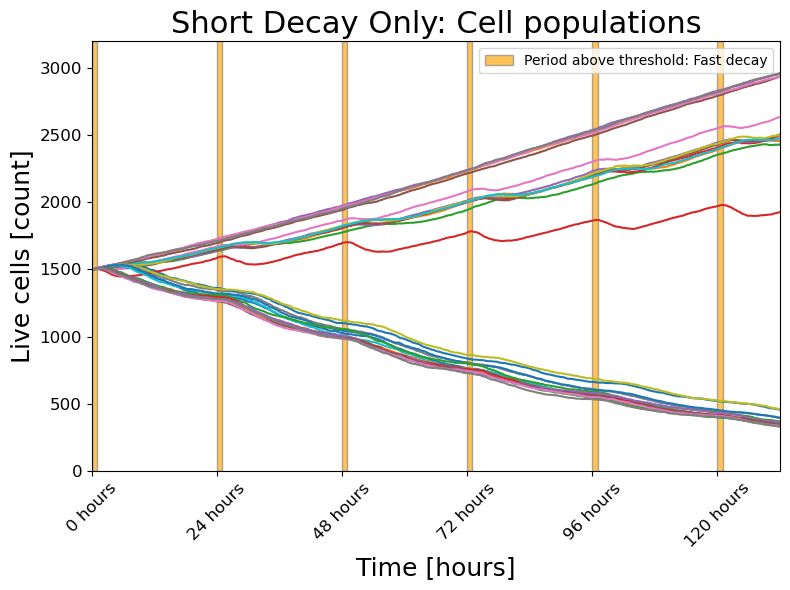

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

for intervention in df_short_decay:
    plt.plot(df_avg.index, df_avg[intervention])

plt.title('Short Decay Only: Cell populations', fontsize=22)
plt.xlabel('Time [hours]', fontsize=18)
plt.ylabel('Live cells [count]', fontsize=18)
plt.xlim(0, df_avg.index[-1])
plt.ylim(0, 3200)
ticks = np.arange(0, len(df_avg.index), 120)
plt.xticks(ticks, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Use set_major_formatter to format ticks as hours

def fmt_index_to_hours(x, pos):
    x = x * 12/60 # 12 minutes per index
    return f'{x:.0f} hours'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

# Highlighting the time period from 15.12.2022 to 1.01.2023 and customizing the shaded area
# plt.axvspan(0, 5, facecolor='yellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5)

# put these in a loop to color code the different time periods - every 24 hours.
for tick in ticks:

    # plt.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=1)
    # plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=1)
    plt.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=1)

##### WARNING - THIS ORDER IS (PROPOSEFULLY) REVERSED FROM ABOVE!!!!!!
plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
# plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
# plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)


plt.legend()
plt.tight_layout()
plt.show()

MEDIUM

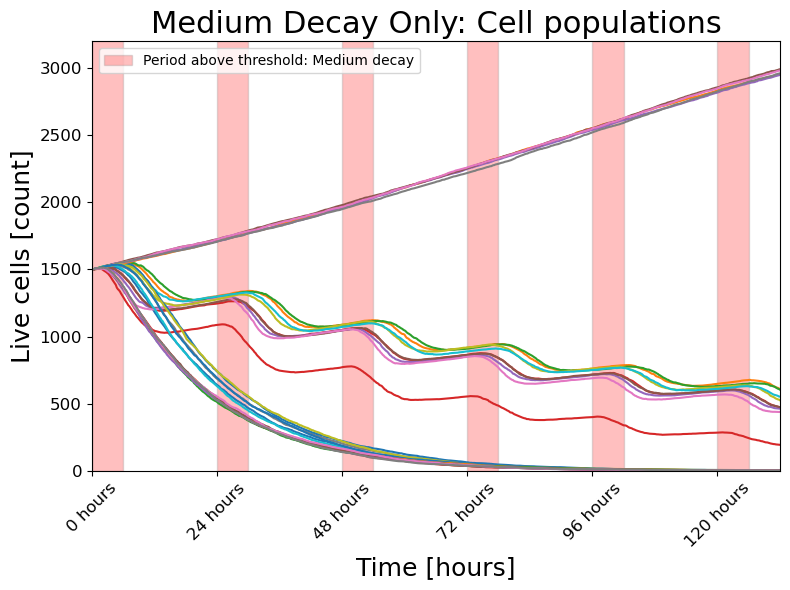

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

for intervention in df_medium_decay:
    plt.plot(df_avg.index, df_avg[intervention])

plt.title('Medium Decay Only: Cell populations', fontsize=22)
plt.xlabel('Time [hours]', fontsize=18)
plt.ylabel('Live cells [count]', fontsize=18)
plt.xlim(0, df_avg.index[-1])
plt.ylim(0, 3200)
ticks = np.arange(0, len(df_avg.index), 120)
plt.xticks(ticks, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Use set_major_formatter to format ticks as hours

def fmt_index_to_hours(x, pos):
    x = x * 12/60 # 12 minutes per index
    return f'{x:.0f} hours'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

# Highlighting the time period from 15.12.2022 to 1.01.2023 and customizing the shaded area
# plt.axvspan(0, 5, facecolor='yellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5)

# put these in a loop to color code the different time periods - every 24 hours.
for tick in ticks:

    # plt.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=1)
    plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=1)
    # plt.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=1)

##### WARNING - THIS ORDER IS (PROPOSEFULLY) REVERSED FROM ABOVE!!!!!!
# plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
# plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)


plt.legend()
plt.tight_layout()
plt.show()

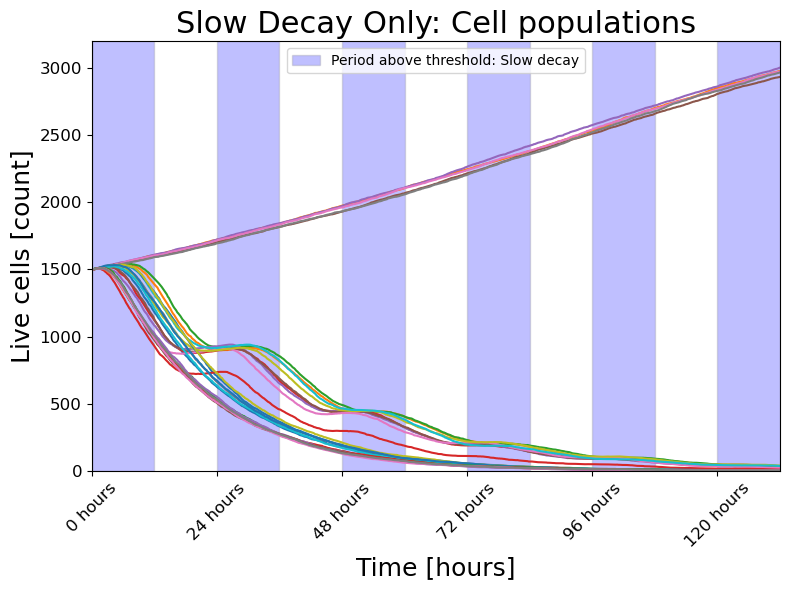

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

for intervention in df_long_decay:
    plt.plot(df_avg.index, df_avg[intervention])

plt.title('Slow Decay Only: Cell populations', fontsize=22)
plt.xlabel('Time [hours]', fontsize=18)
plt.ylabel('Live cells [count]', fontsize=18)
plt.xlim(0, df_avg.index[-1])
plt.ylim(0, 3200)
ticks = np.arange(0, len(df_avg.index), 120)
plt.xticks(ticks, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Use set_major_formatter to format ticks as hours

def fmt_index_to_hours(x, pos):
    x = x * 12/60 # 12 minutes per index
    return f'{x:.0f} hours'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

# Highlighting the time period from 15.12.2022 to 1.01.2023 and customizing the shaded area
# plt.axvspan(0, 5, facecolor='yellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5)

# put these in a loop to color code the different time periods - every 24 hours.
for tick in ticks:

    plt.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=1)
    # plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=1)
    # plt.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=1)

##### WARNING - THIS ORDER IS (PROPOSEFULLY) REVERSED FROM ABOVE!!!!!!
# plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
# plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)


plt.legend()
plt.tight_layout()
plt.show()

EGDETIC

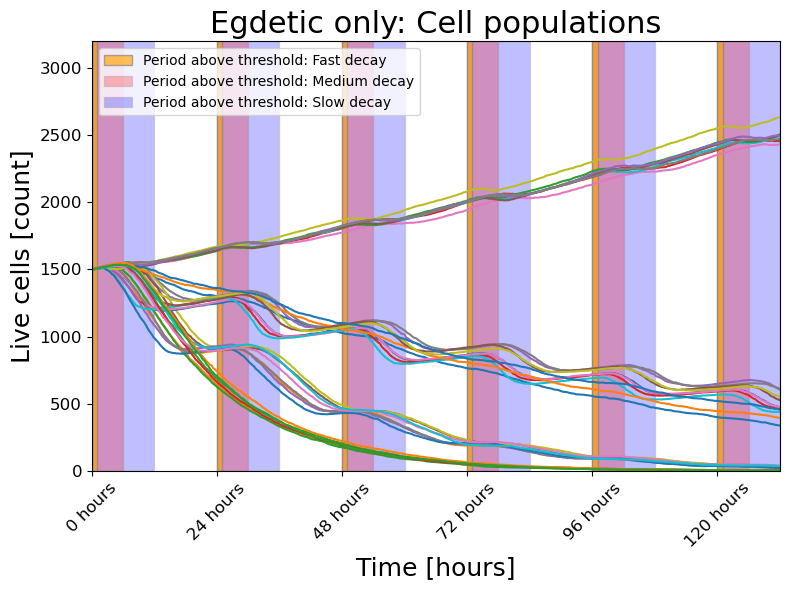

In [15]:

fig, ax = plt.subplots(figsize=(8, 6))

for intervention in df_EG:
    plt.plot(df_avg.index, df_avg[intervention])

plt.title('Egdetic only: Cell populations', fontsize=22)
plt.xlabel('Time [hours]', fontsize=18)
plt.ylabel('Live cells [count]', fontsize=18)
plt.xlim(0, df_avg.index[-1])
plt.ylim(0, 3200)
ticks = np.arange(0, len(df_avg.index), 120)
plt.xticks(ticks, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Use set_major_formatter to format ticks as hours

def fmt_index_to_hours(x, pos):
    x = x * 12/60 # 12 minutes per index
    return f'{x:.0f} hours'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

# Highlighting the time period from 15.12.2022 to 1.01.2023 and customizing the shaded area
# plt.axvspan(0, 5, facecolor='yellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5)

# put these in a loop to color code the different time periods - every 24 hours.
for tick in ticks:

    plt.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=1)
    plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=1)
    plt.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=1)

##### WARNING - THIS ORDER IS (PROPOSEFULLY) REVERSED FROM ABOVE!!!!!!
plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)


plt.legend()
plt.tight_layout()
plt.show()

IBMFA!

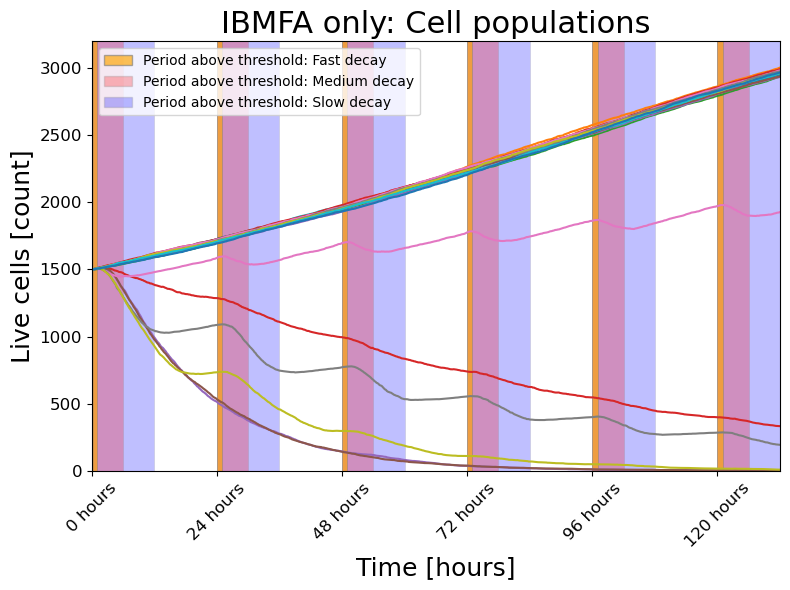

In [16]:

fig, ax = plt.subplots(figsize=(8, 6))

for intervention in df_IB:
    plt.plot(df_avg.index, df_avg[intervention])

plt.title('IBMFA only: Cell populations', fontsize=22)
plt.xlabel('Time [hours]', fontsize=18)
plt.ylabel('Live cells [count]', fontsize=18)
plt.xlim(0, df_avg.index[-1])
plt.ylim(0, 3200)
ticks = np.arange(0, len(df_avg.index), 120)
plt.xticks(ticks, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Use set_major_formatter to format ticks as hours

def fmt_index_to_hours(x, pos):
    x = x * 12/60 # 12 minutes per index
    return f'{x:.0f} hours'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

# Highlighting the time period from 15.12.2022 to 1.01.2023 and customizing the shaded area
# plt.axvspan(0, 5, facecolor='yellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5)

# put these in a loop to color code the different time periods - every 24 hours.
for tick in ticks:

    plt.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=0.5)
    plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=0.5)
    plt.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=0.5)

##### WARNING - THIS ORDER IS (PROPOSEFULLY) REVERSED FROM ABOVE!!!!!!
plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)


plt.legend()
plt.tight_layout()
plt.show()

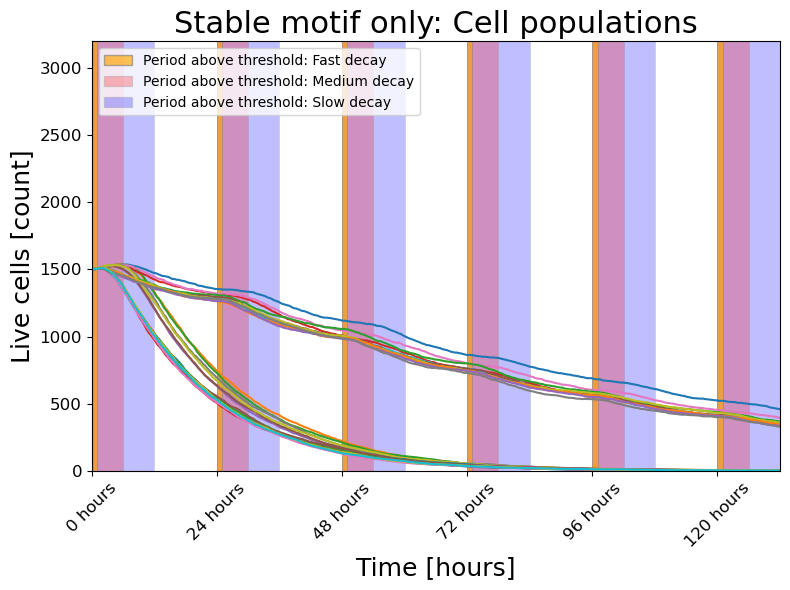

In [17]:

fig, ax = plt.subplots(figsize=(8, 6))

for intervention in df_SM:
    plt.plot(df_avg.index, df_avg[intervention])

plt.title('Stable motif only: Cell populations', fontsize=22)
plt.xlabel('Time [hours]', fontsize=18)
plt.ylabel('Live cells [count]', fontsize=18)
plt.xlim(0, df_avg.index[-1])
plt.ylim(0, 3200)
ticks = np.arange(0, len(df.index), 120)
plt.xticks(ticks, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Use set_major_formatter to format ticks as hours

def fmt_index_to_hours(x, pos):
    x = x * 12/60 # 12 minutes per index
    return f'{x:.0f} hours'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

# Highlighting the time period from 15.12.2022 to 1.01.2023 and customizing the shaded area
# plt.axvspan(0, 5, facecolor='yellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5)

# put these in a loop to color code the different time periods - every 24 hours.
for tick in ticks:

    plt.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=0.5)
    plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=0.5)
    plt.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=0.5)

##### WARNING - THIS ORDER IS (PROPOSEFULLY) REVERSED FROM ABOVE!!!!!!
plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)


plt.legend()
plt.tight_layout()
plt.show()

### Now we will break it down ALL the WAY!

Each category will get its own dataframe and plot

In [18]:
df_short_EG = df_categories[(df_categories.decay == '1') & (df_categories.algorithm == 'EG')].transpose()

df_medium_EG = df_categories[(df_categories.decay == '2') & (df_categories.algorithm == 'EG')].transpose()

df_long_EG = df_categories[(df_categories.decay == '3') & (df_categories.algorithm == 'EG')].transpose()

df_short_IB = df_categories[(df_categories.decay == '1') & (df_categories.algorithm == 'IB')].transpose()

df_medium_IB = df_categories[(df_categories.decay == '2') & (df_categories.algorithm == 'IB')].transpose()

df_long_IB = df_categories[(df_categories.decay == '3') & (df_categories.algorithm == 'IB')].transpose()

df_short_SM = df_categories[(df_categories.decay == '1') & (df_categories.algorithm == 'SM')].transpose()

df_medium_SM = df_categories[(df_categories.decay == '2') & (df_categories.algorithm == 'SM')].transpose()

df_long_SM = df_categories[(df_categories.decay == '3') & (df_categories.algorithm == 'SM')].transpose()

Lets make a dicitonary of these!!!

In [19]:
individual_categories = {}
individual_categories = {'df_Fast_EG': df_short_EG, 'df_Medium_EG': df_medium_EG, 'df_Slow_EG': df_long_EG, 'df_Fast_IB': df_short_IB, 
                         'df_Medium_IB': df_medium_IB, 'df_Slow_IB': df_long_IB, 'df_Fast_SM': df_short_SM, 'df_Medium_SM': df_medium_SM, 'df_Slow_SM': df_long_SM}

In [20]:
for key in individual_categories:
    print(key.split('_'))

['df', 'Fast', 'EG']
['df', 'Medium', 'EG']
['df', 'Slow', 'EG']
['df', 'Fast', 'IB']
['df', 'Medium', 'IB']
['df', 'Slow', 'IB']
['df', 'Fast', 'SM']
['df', 'Medium', 'SM']
['df', 'Slow', 'SM']


In [21]:
def plot_category(df_name, df, df_avg):
    split_category_name = df_name.split('_')
    title = f'{split_category_name[1]} Decay {split_category_name[2]} Only: Cell populations'
    fig, ax = plt.subplots(figsize=(8, 6))

    for intervention in df:
        plt.plot(df_avg.index, df_avg[intervention])

    plt.title(title, fontsize=22)
    plt.xlabel('Time [hours]', fontsize=18)
    plt.ylabel('Live cells [count]', fontsize=18)
    plt.xlim(0, df_avg.index[-1])
    plt.ylim(0, 3200)
    ticks = np.arange(0, len(df_avg.index), 120)
    plt.xticks(ticks, rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # Use set_major_formatter to format ticks as hours

    def fmt_index_to_hours(x, pos):
        x = x * 12/60 # 12 minutes per index
        return f'{x:.0f} hours'
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

    # Highlighting the time period from 15.12.2022 to 1.01.2023 and customizing the shaded area
    # plt.axvspan(0, 5, facecolor='yellow', alpha=0.5, hatch='/', edgecolor='red', linewidth=5)

    # put these in a loop to color code the different time periods - every 24 hours.
    for tick in ticks:
        if split_category_name[1] == 'Fast':
            plt.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=1)
        elif split_category_name[1] == 'Medium':
            plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=1)
        elif split_category_name[1] == 'Slow':
            plt.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=1)
        # plt.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=1)
        # plt.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=1)
        # plt.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=1)

    ##### WARNING - THIS ORDER IS (PROPOSEFULLY) REVERSED FROM ABOVE!!!!!!
    if split_category_name[1] == 'Short':
        plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
    elif split_category_name[1] == 'Medium':
        plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
    elif split_category_name[1] == 'Long':
        plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)
    # plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
    # plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
    # plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)


    plt.legend()
    plt.tight_layout()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


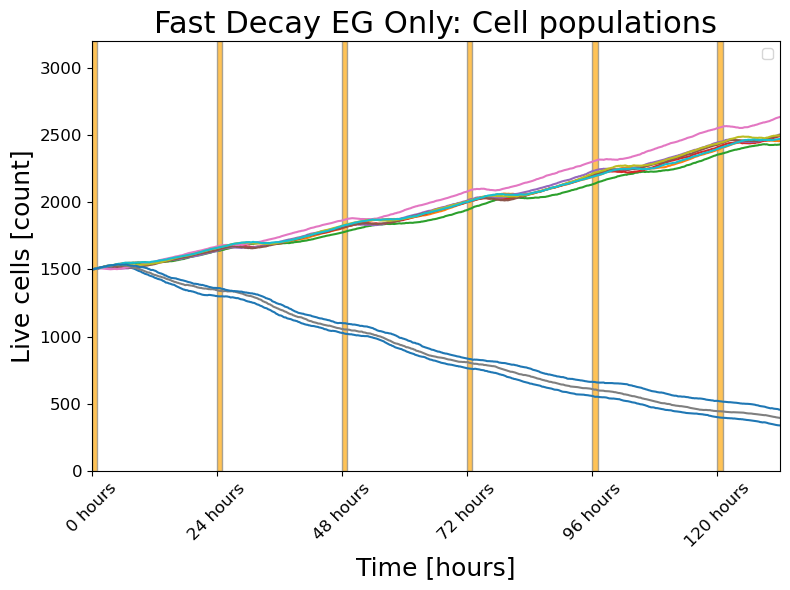

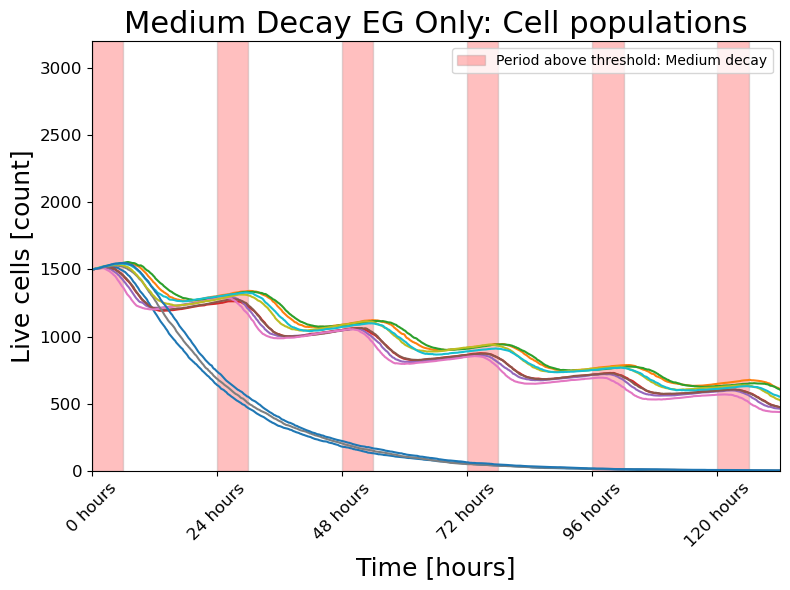

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


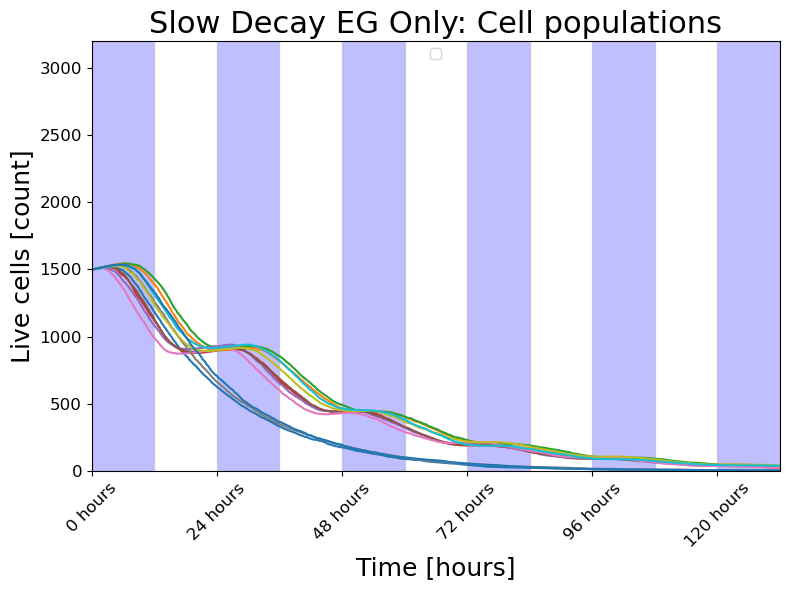

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


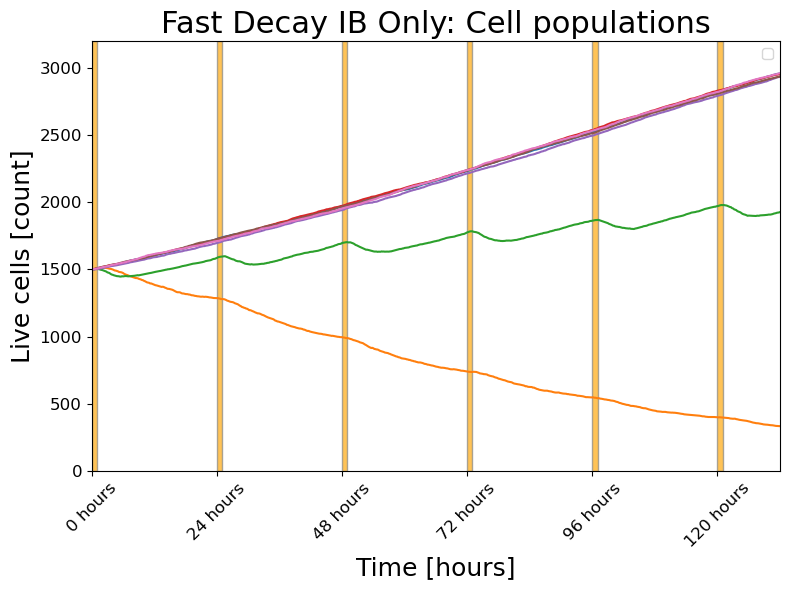

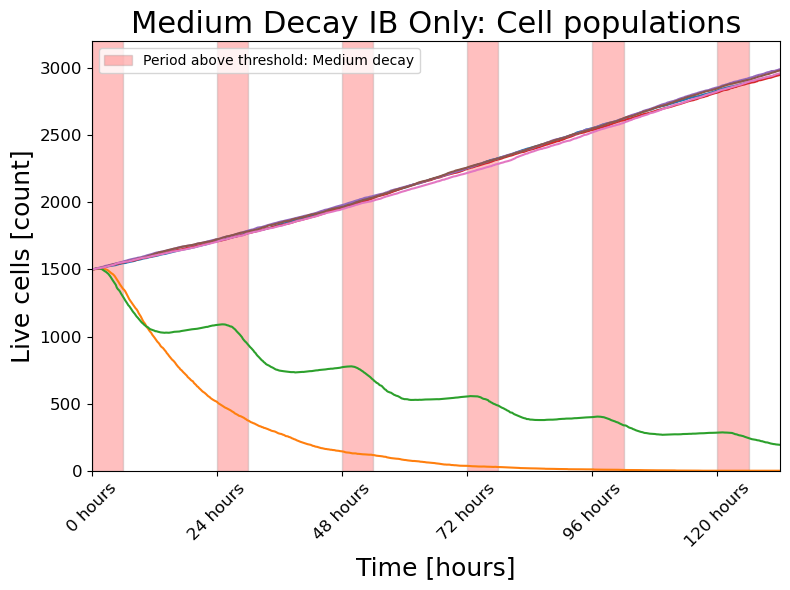

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


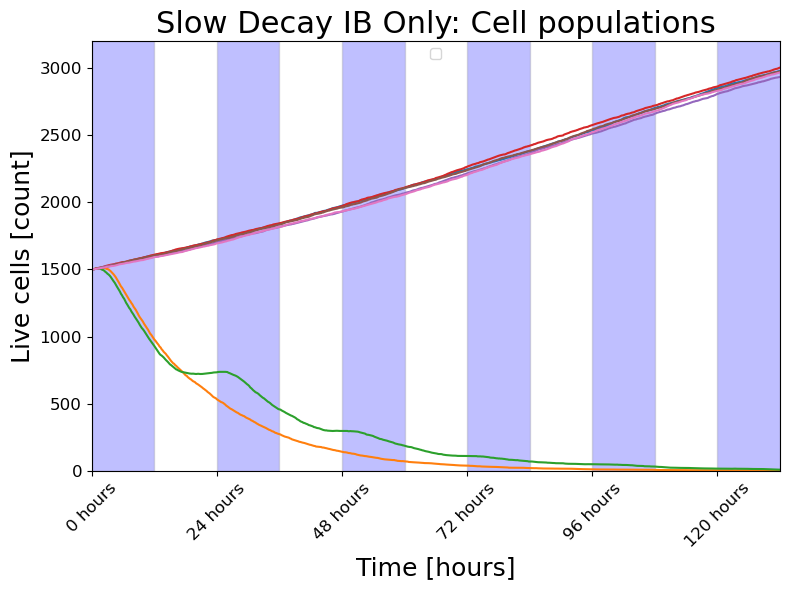

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


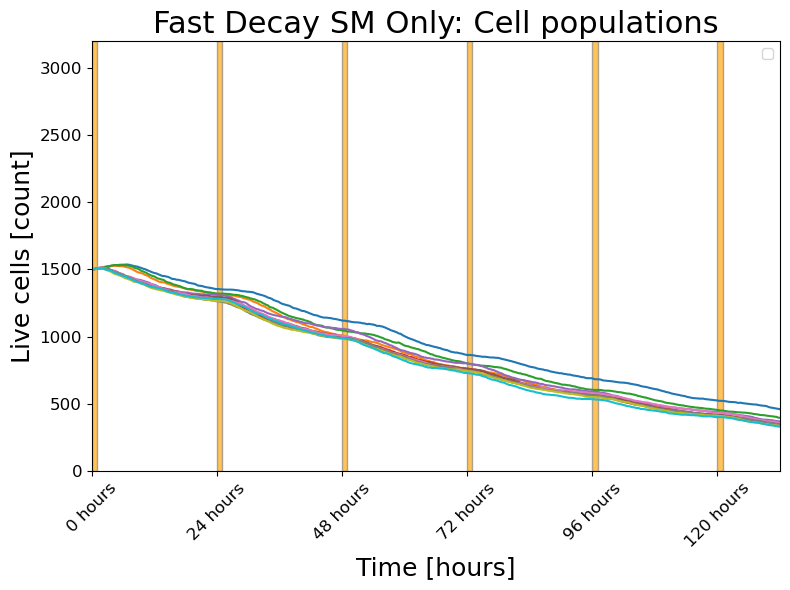

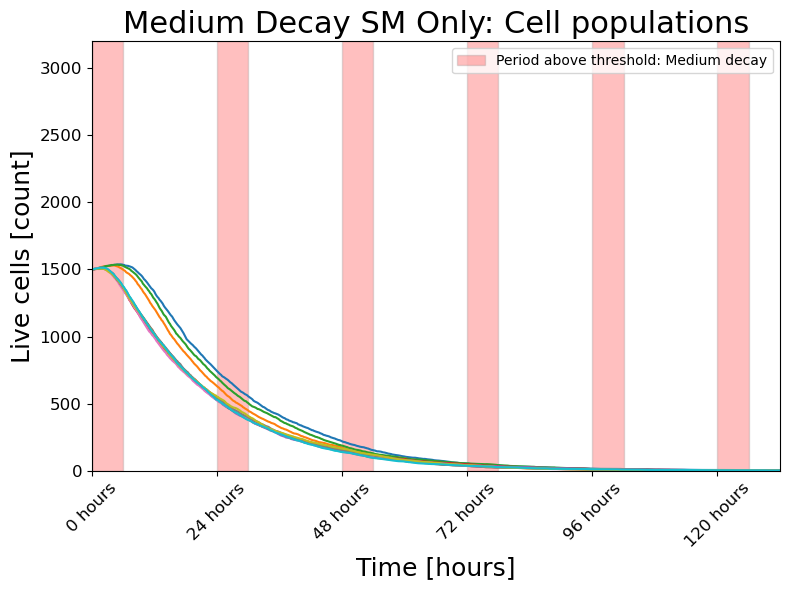

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


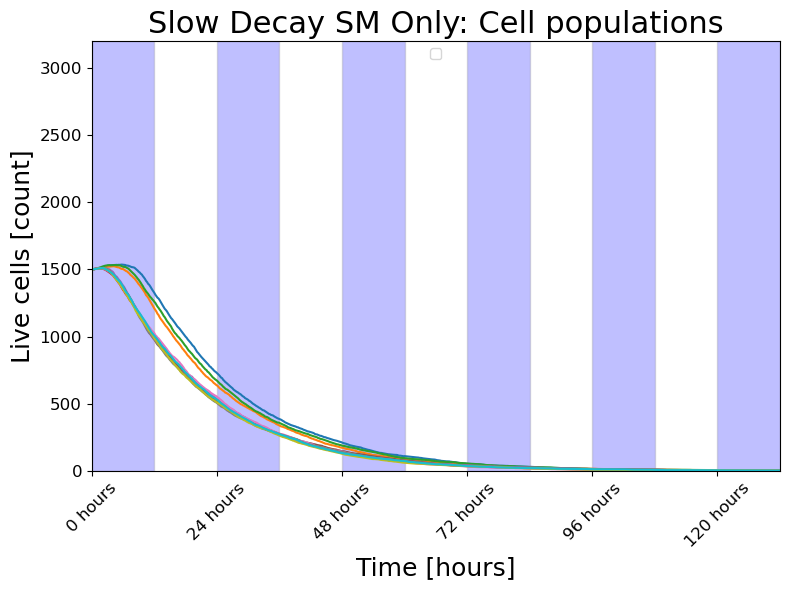

In [22]:
for category_name in individual_categories:
    plot_category(category_name, individual_categories[category_name], df_avg)

## Lets make this an array ... 

In [23]:
def plot_category_array(df_name: str, df, df_avg, ax):
    split_category_name = df_name.split('_')
    title = f'{split_category_name[1]} Decay {split_category_name[2]} Only: Cell populations'
    # fig, ax = plt.subplots(figsize=(8, 6))
    linestyles = ['solid', 'dotted', 'dashed', 'dashdot', (0, (3, 1, 1, 1, 1, 1)), (5, (10, 3)), (0, (5, 1)), (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)), (0, (3, 1, 1, 1)), (0, (5, 10))] 
    for i, intervention in enumerate(df): 
        ax.plot(df_avg.index, df_avg[intervention], label=intervention, linestyle=linestyles[i]) # tried to make a marker here - but it didn't work. Markers are too dense. I could try line style. I think though I am about done. 

    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Time [hours]', fontsize=12)
    ax.set_ylabel('Live cells [count]', fontsize=12)
    ax.set_xlim(0, df_avg.index[-1])
    ax.set_ylim(0, 3200)
    ticks = np.arange(0, len(df_avg.index), 120)
    # ax.set_xticks(ticks, rotation=45, fontsize=10)
    ax.set_xticks(ticks, minor=False)
    # ax.set_yticks(fontsize=10)

    # Use set_major_formatter to format ticks as hours

    def fmt_index_to_hours(x, pos):
        x = x * 12/60 # 12 minutes per index
        return f'{x:.0f} hours'
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_index_to_hours))

    # put these in a loop to color code the different time periods - every 24 hours.
    for tick in ticks:
        if split_category_name[1] == 'Fast':
            ax.axvspan(tick, tick+5, facecolor='orange', alpha=0.66, edgecolor='grey', linewidth=1)
        elif split_category_name[1] == 'Medium':
            ax.axvspan(tick, tick+30, facecolor='red', alpha=0.25, edgecolor='grey', linewidth=1)
        elif split_category_name[1] == 'Slow':
            ax.axvspan(tick, tick+60, facecolor='blue', alpha=0.25, edgecolor='grey', linewidth=1)

    ##### WARNING - THIS ORDER IS (PROPOSEFULLY) REVERSED FROM ABOVE!!!!!!
    # if split_category_name[1] == 'short':
    #     plt.axvspan(0, 0, facecolor='orange', alpha=0.66, label='Period above threshold: Fast decay', edgecolor='grey', linewidth=1)
    # elif split_category_name[1] == 'medium':
    #     plt.axvspan(0, 0, facecolor='red', alpha=0.25, label='Period above threshold: Medium decay', edgecolor='grey', linewidth=1)
    # elif split_category_name[1] == 'long':
    #     plt.axvspan(0, 0, facecolor='blue', alpha=0.25, label='Period above threshold: Slow decay', edgecolor='grey', linewidth=1)

    ax.legend()
    # plt.tight_layout()
    # plt.show()
    return ax

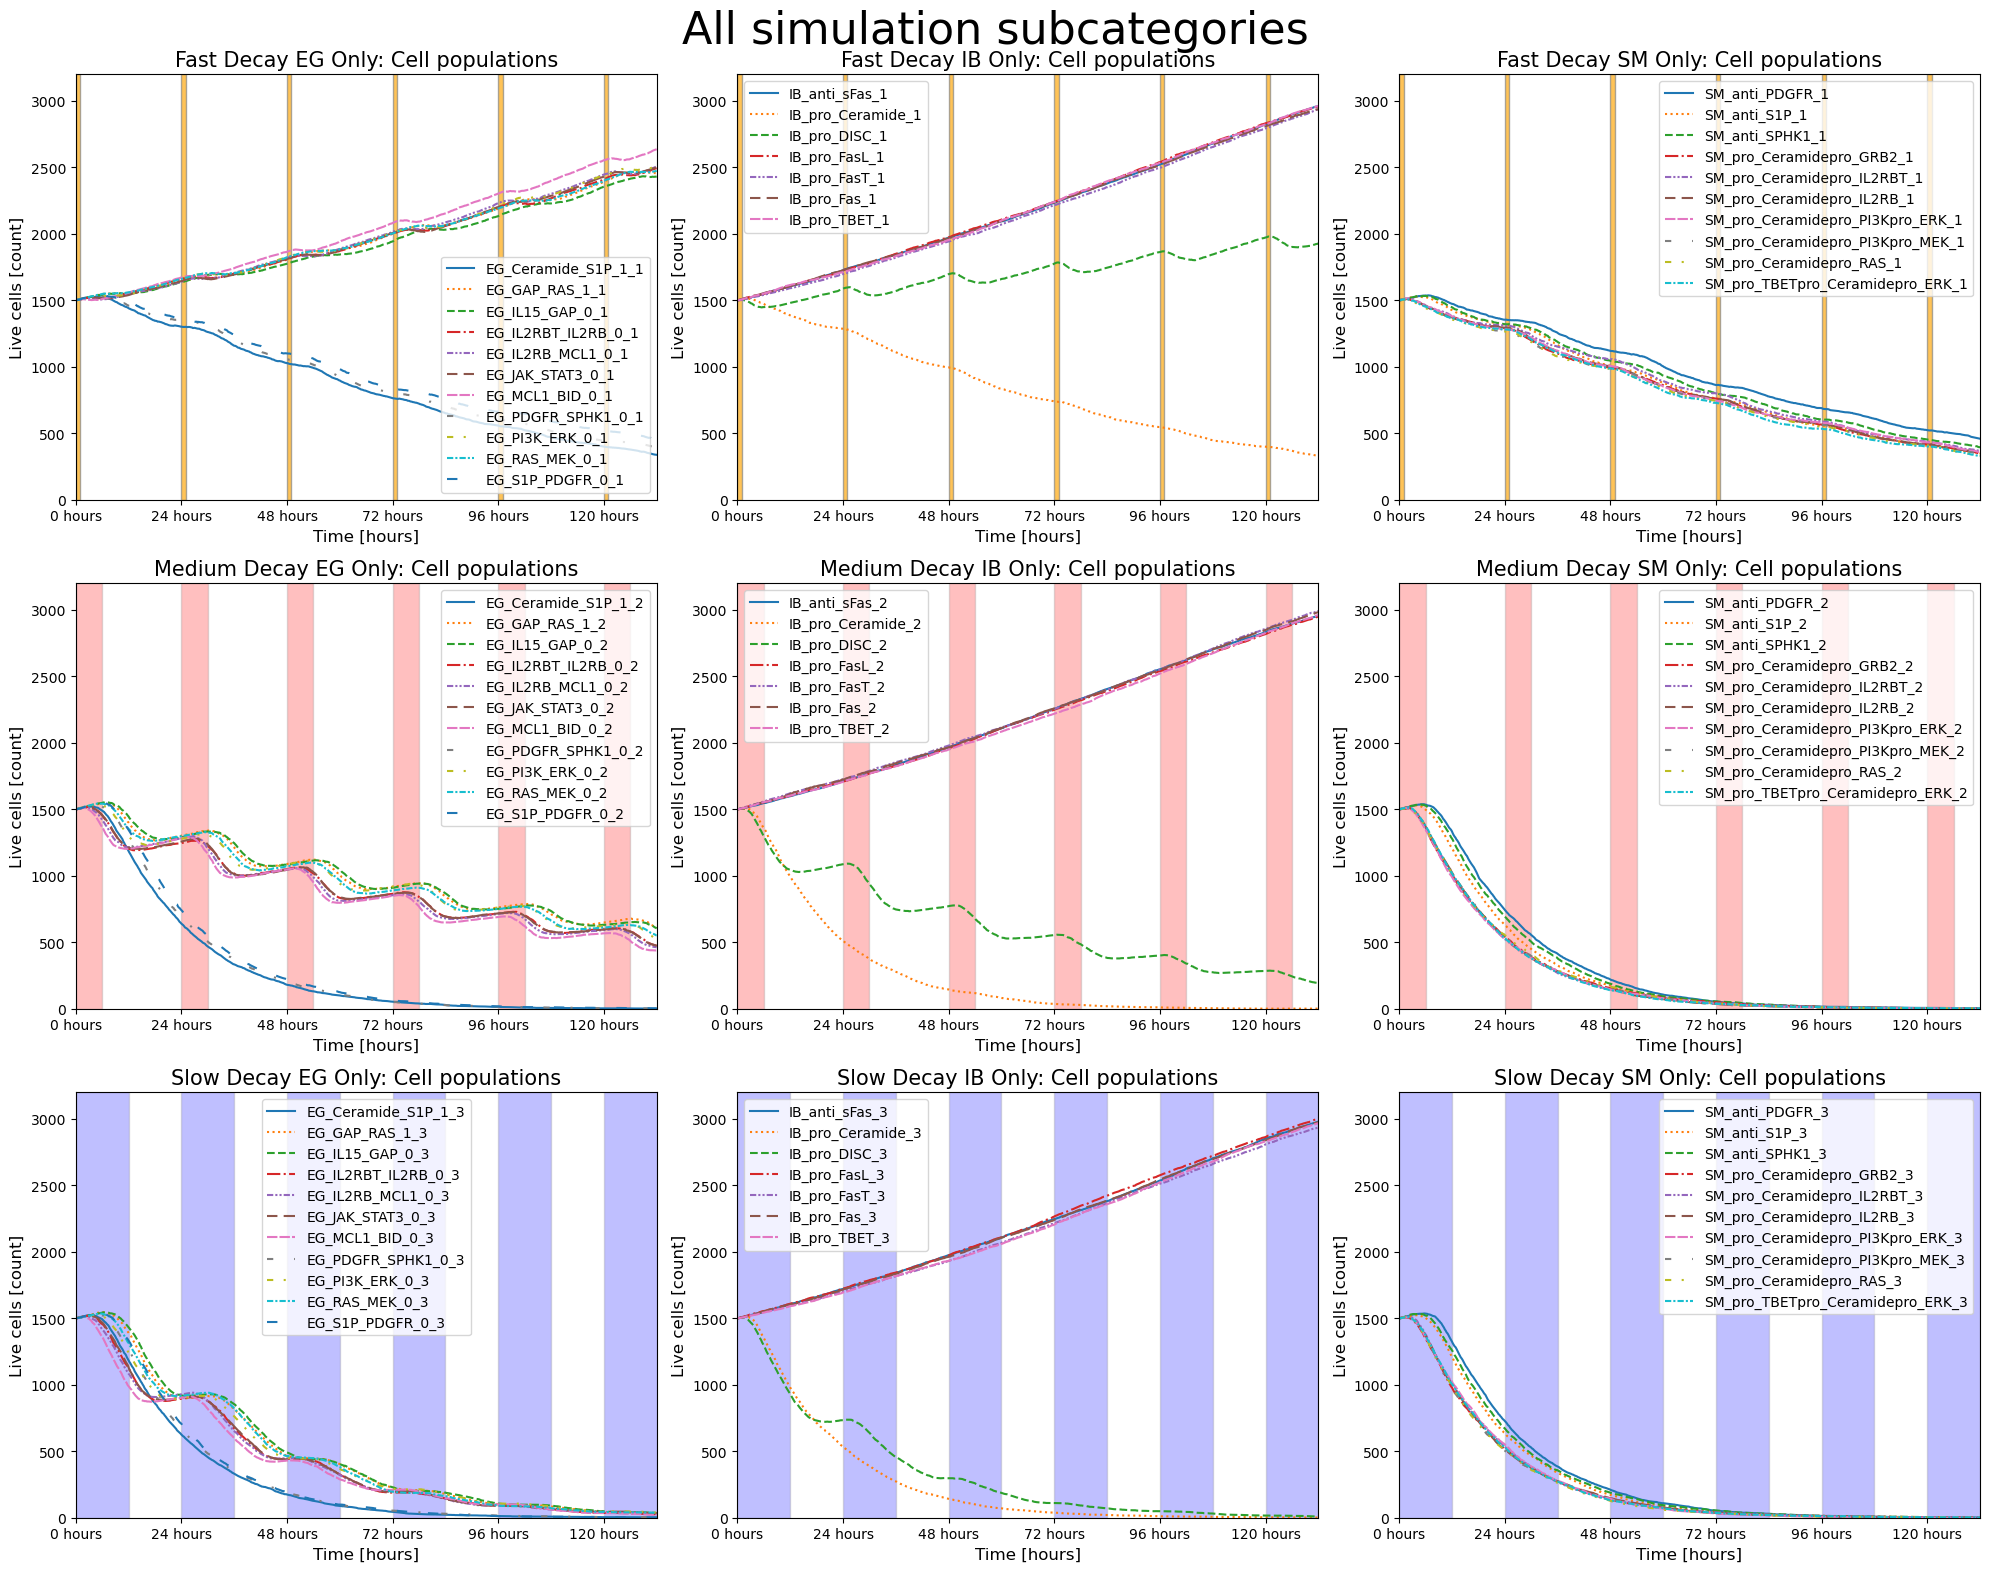

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(20, 16))

for category_name, ax in zip(individual_categories, axes.ravel(order='F')):    
    ax = plot_category_array(category_name, individual_categories[category_name], df_avg, ax)

fig.suptitle('All simulation subcategories', fontsize=32)
plt.tight_layout()
plt.savefig('../figures/all_simulation_subcategories.png', dpi=600)
plt.show()

### Conclusion

We  can see that in the left column (the egdetic perturbations), that some interventions succeed at the higest rate of decay (least exposure): Ceramide_S1P_1, S1P_PDGRF_0, and PDGRF_SPHK1_0. However, the others fail to control the population at this lower exposure. 

However, in both the target control simulation and in the MaBoSS analysis (see other notebooks), all are predicted to have control. 

Of the IBMFA-derived apoptosis interventions, we note that only the pro_Ceramide and pro_DISC interventions succeed (pro_DISC controls population at higher exposures). Of note, the MaBoSS analysis comports with this PhysiBoSS analysis - that only pro_DISC and pro_Ceramid would succeed. 